In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from matplotlib.colors import ListedColormap
import plotly.express as px
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the iris dataset
iris = pd.read_csv("iris.csv")
iris["species"] = iris["species"].apply(lambda x: x[5:])
iris['target'] = iris["species"].apply(
    lambda x: 0 if x == "setosa" else (1 if x == "versicolor" else 2))
X = iris[['petal_length', 'petal_width']].to_numpy()
y = iris['target'].to_numpy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10)


In [3]:
px.scatter(iris, x='petal_length', y='petal_width',
           color=iris['species'], labels={'petal_length': 'Petal Length', 'petal_width': 'Petal Width'})


In [4]:

# train the model with KNeighborsClassifier
k = 5 # number of neighbors
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train, y_train)


# predict using the trained model
y_pred = clf.predict(X_test)

### Decision boundaries

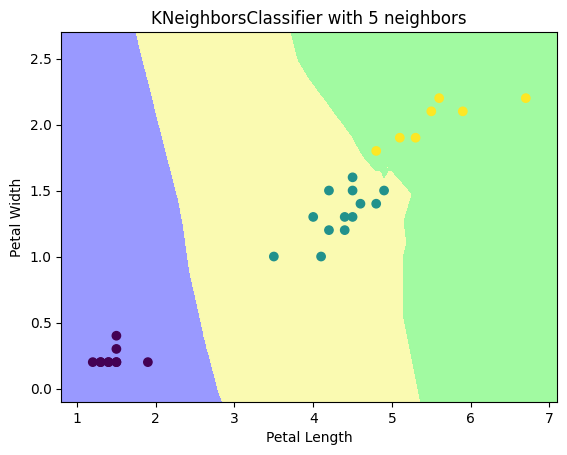

In [5]:
# Plot the decision boundaries
x0_min, x0_max = X_train[:, 0].min() - 0.2, X_train[:, 0].max() + 0.2
x1_min, x1_max = X_train[:, 1].min() - 0.2, X_train[:, 1].max() + 0.2
xx0, xx1 = np.meshgrid(np.linspace(x0_min, x0_max, 1000),
                       np.linspace(x1_min, x1_max, 1000))
X_new = np.c_[xx0.ravel(), xx1.ravel()]
y_predict = clf.predict(X_new)
zz = y_predict.reshape(xx0.shape)
custom_cmap = ListedColormap(['#9898ff', '#fafab0', '#a0faa0'])
plt.contourf(xx0, xx1, zz, cmap=custom_cmap, alpha=0.99)

# Plot the dataset
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title(f"KNeighborsClassifier with {k} neighbors")
plt.show()

    . Based on the decision boundaries, we can conclude that the KNeighborsClassifier model is more effective than the LinearSVC model as it accurately classifies all three classes.

### Perfomance Indicators

In [6]:
# display the performance indicators of your model
line = f"\n{25*'- '}"
print("Performance Indicators on Test Set:", line)
print("Confusion Matrix:\n", pd.DataFrame(confusion_matrix(y_test, y_pred), index=[
      'setosa', 'versicolor', 'virginica'], columns=['setosa', 'versicolor', 'virginica']), line)
print("Precision Score:", precision_score(
    y_test, y_pred, average='macro'), line)
print("Recall Score:", recall_score(y_test, y_pred, average='macro'), line)


Performance Indicators on Test Set: 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Confusion Matrix:
             setosa  versicolor  virginica
setosa          10           0          0
versicolor       0          13          0
virginica        0           0          7 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Precision Score: 1.0 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Recall Score: 1.0 
- - - - - - - - - - - - - - - - - - - - - - - - - 


### LinearSVC

In [7]:
# With the best parameters C = 1
Best_score_set=  1.0
Recall_score_set= 1.0
set = [1.0,1.0]

# With the best parameters C = 100
Best_score_ver=  0.7333
Recall_score_ver= 0.1111
ver = [0.7333,0.1111]

# With the best parameters C = 1
Best_score_vir = 1.0
Recall_score_vir = 1.0
vir = [1.0, 1.0]
df_linearSVC = pd.DataFrame(np.array([set, ver, vir]).transpose(), columns=[
                            'setosa', 'versicolor', 'virginica'], index=['Best_score',  'Recall_score'])
df_linearSVC['mean'] = df_linearSVC.mean(axis=1)
df_linearSVC


,setosa,versicolor,virginica,mean
Best_score,1.0,0.7333,1.0,0.9111
Recall_score,1.0,0.1111,1.0,0.7037


#### Point of vue
    . The LinearSVC gives us 3 indicator per modality
    . When we make the mean the KNeighborsClassifier are still the best
    . I can conclude that the best model is KNeighborsClassifier for this dataset

In [8]:
# define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# create a KNeighborsClassifier object
clf = KNeighborsClassifier()

# create a GridSearchCV object
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

# fit the model using the training data
grid_search.fit(X_train, y_train)

# print the best hyperparameter value found
print("Best value of k:", grid_search.best_params_['n_neighbors'], line)

# get the best model
best_model = grid_search.best_estimator_

# predict using the best model
y_pred = best_model.predict(X_test)

# display the performance indicators of your model
print("Performance Indicators:", line)
print("Confusion Matrix:\n", pd.DataFrame(confusion_matrix(y_test, y_pred), index=[
      'setosa', 'versicolor', 'virginica'], columns=['setosa', 'versicolor', 'virginica']), line)
print("Precision Score:\n", precision_score(
    y_test, y_pred, average='macro'), line)
print("Recall Score:", recall_score(y_test, y_pred, average='macro'), line)


Best value of k: 7 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Performance Indicators: 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Confusion Matrix:
             setosa  versicolor  virginica
setosa          10           0          0
versicolor       0          13          0
virginica        0           0          7 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Precision Score:
 1.0 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Recall Score: 1.0 
- - - - - - - - - - - - - - - - - - - - - - - - - 


Decision trees

In [9]:
# Load the iris dataset
iris = pd.read_csv("iris.csv")
iris["species"] = iris["species"].apply(lambda x: x[5:])
iris['target'] = iris["species"].apply(
    lambda x: 0 if x == "setosa" else (1 if x == "versicolor" else 2))
X = iris[['petal_length', 'petal_width']].to_numpy()
y = iris['target'].to_numpy()

# Split the data into training and testing set
# s
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=10)

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns

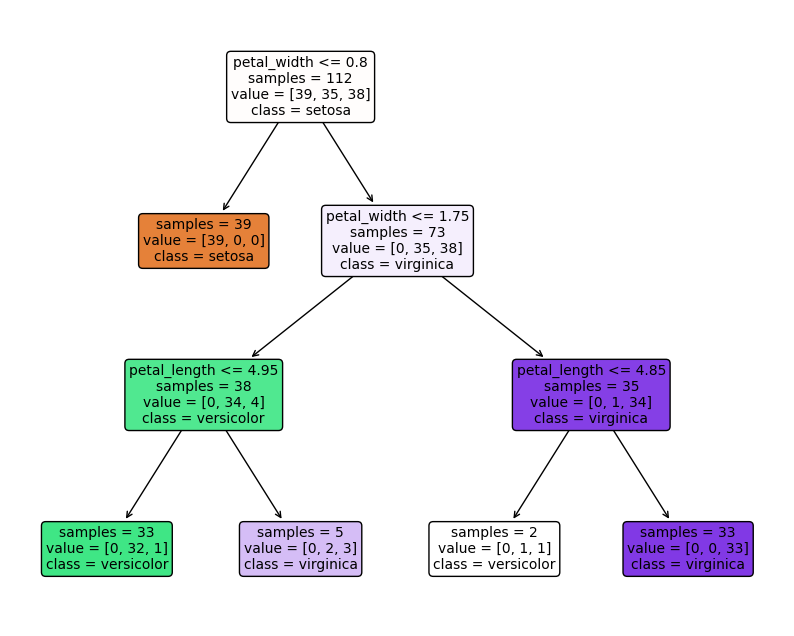

In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=10)

# Train the model with Decision Tree algorithm
clf = DecisionTreeClassifier(max_depth = 3, random_state=10)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(10, 8))
sns.set_palette("Paired")
plot_tree(clf, filled=True, feature_names=['petal_length', 'petal_width'], class_names=['setosa', 'versicolor', 'virginica'], rounded=True, fontsize=10, node_ids=False, impurity=False,)
plt.savefig('Decision_trees.png')  # predict using the trained model

# Predict using the trained model
y_pred = clf.predict(X_test)


In [21]:
from PIL import Image

# Load image
image = Image.open("Decision_trees.png")

# Show image
image.show()


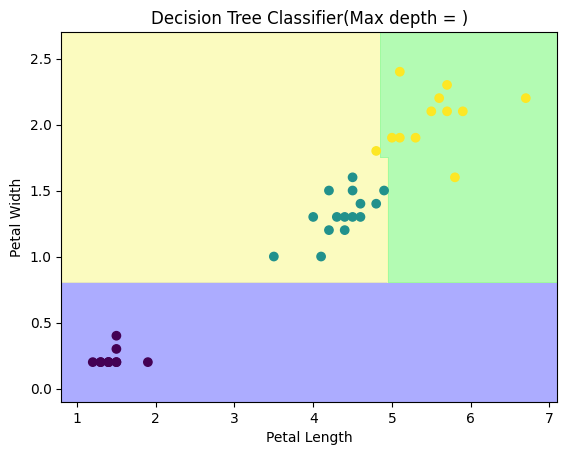

In [13]:
# Plot the decision boundaries
x0_min, x0_max = X_train[:, 0].min() - 0.2, X_train[:, 0].max() + 0.2
x1_min, x1_max = X_train[:, 1].min() - 0.2, X_train[:, 1].max() + 0.2
xx0, xx1 = np.meshgrid(np.linspace(x0_min, x0_max, 1000),
                       np.linspace(x1_min, x1_max, 1000))
X_new = np.c_[xx0.ravel(), xx1.ravel()]
y_predict = clf.predict(X_new)
zz = y_predict.reshape(xx0.shape)
custom_cmap = ListedColormap(['#9898ff', '#fafab0', '#a0faa0'])
plt.contourf(xx0, xx1, zz, cmap=custom_cmap, alpha=0.8)

# Plot the dataset
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title("Decision Tree Classifier(Max depth = )")

plt.show()

    . Based on the decision boundaries, we can conclude that the Decision Trees model is more effective than the LinearSVC model as it accurately classifies all three classes, but it is less effective than the KNeighborsClassifier model which fits the model more closely.

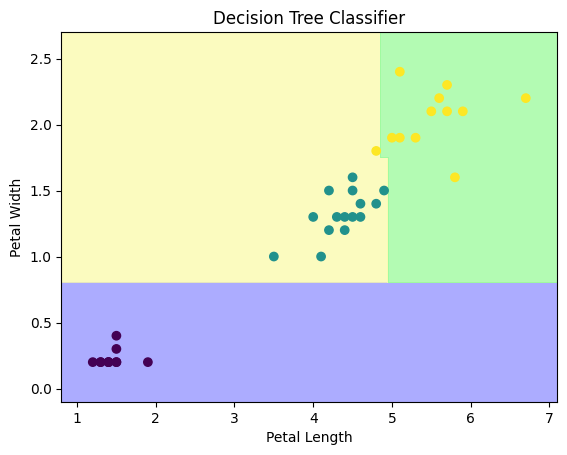

Performance Indicators: 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Confusion Matrix:
             setosa  versicolor  virginica
setosa          11           0          0
versicolor       0          15          0
virginica        0           1         11 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Precision Score: 0.9791666666666666 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Recall Score: 0.9722222222222222 
- - - - - - - - - - - - - - - - - - - - - - - - - 


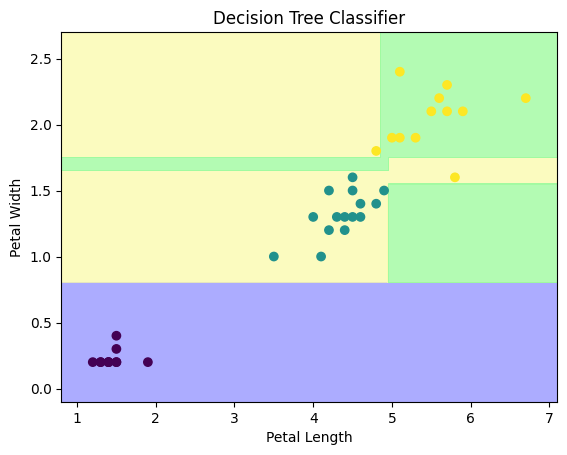

Performance Indicators: 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Confusion Matrix:
             setosa  versicolor  virginica
setosa          11           0          0
versicolor       0          15          0
virginica        0           1         11 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Precision Score: 0.9791666666666666 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Recall Score: 0.9722222222222222 
- - - - - - - - - - - - - - - - - - - - - - - - - 


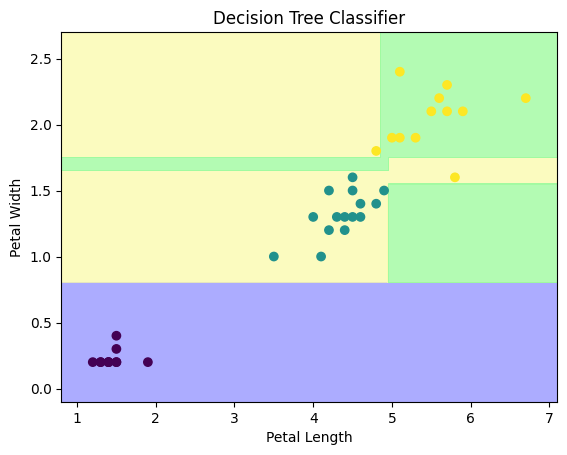

Performance Indicators: 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Confusion Matrix:
             setosa  versicolor  virginica
setosa          11           0          0
versicolor       0          15          0
virginica        0           1         11 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Precision Score: 0.9791666666666666 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Recall Score: 0.9722222222222222 
- - - - - - - - - - - - - - - - - - - - - - - - - 


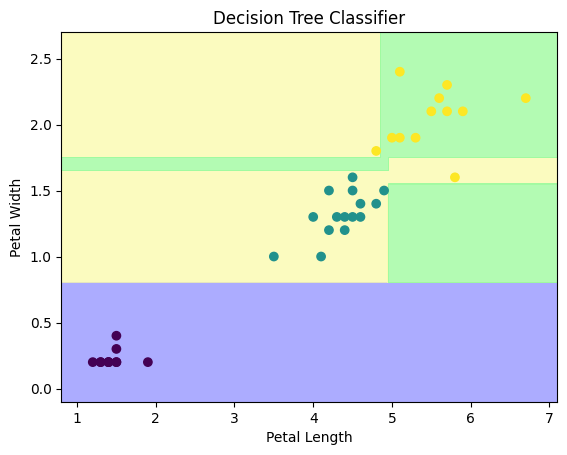

Performance Indicators: 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Confusion Matrix:
             setosa  versicolor  virginica
setosa          11           0          0
versicolor       0          15          0
virginica        0           1         11 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Precision Score: 0.9791666666666666 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Recall Score: 0.9722222222222222 
- - - - - - - - - - - - - - - - - - - - - - - - - 


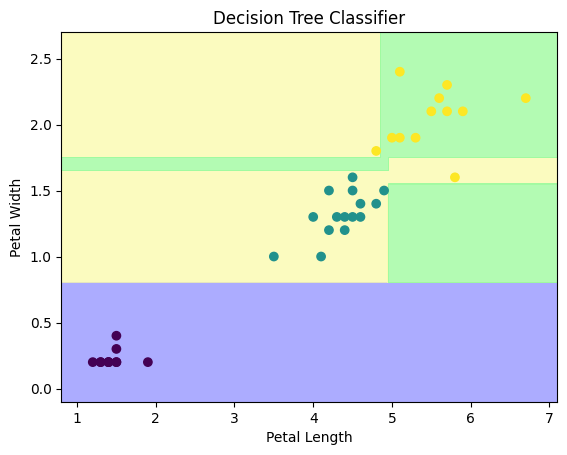

Performance Indicators: 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Confusion Matrix:
             setosa  versicolor  virginica
setosa          11           0          0
versicolor       0          15          0
virginica        0           1         11 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Precision Score: 0.9791666666666666 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Recall Score: 0.9722222222222222 
- - - - - - - - - - - - - - - - - - - - - - - - - 


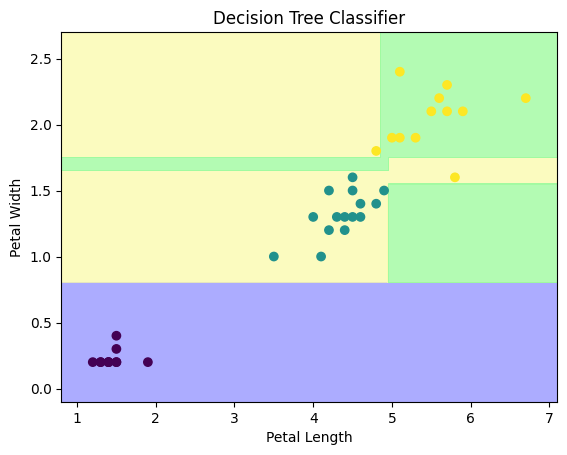

Performance Indicators: 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Confusion Matrix:
             setosa  versicolor  virginica
setosa          11           0          0
versicolor       0          15          0
virginica        0           1         11 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Precision Score: 0.9791666666666666 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Recall Score: 0.9722222222222222 
- - - - - - - - - - - - - - - - - - - - - - - - - 


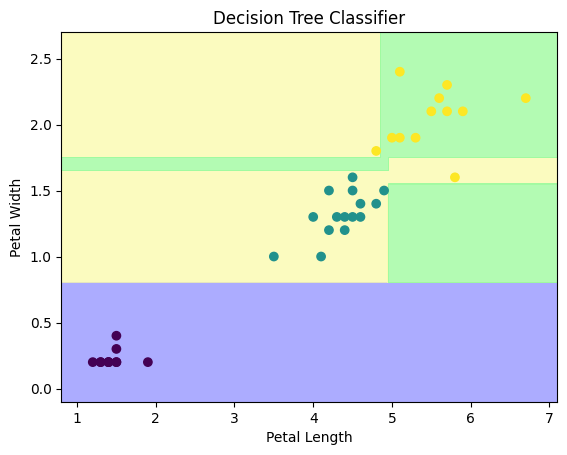

Performance Indicators: 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Confusion Matrix:
             setosa  versicolor  virginica
setosa          11           0          0
versicolor       0          15          0
virginica        0           1         11 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Precision Score: 0.9791666666666666 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Recall Score: 0.9722222222222222 
- - - - - - - - - - - - - - - - - - - - - - - - - 


In [14]:
for depth in range(3,10):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=10)

    # Train the model with Decision Tree algorithm
    clf = DecisionTreeClassifier(max_depth=depth, random_state=10)
    clf.fit(X_train, y_train)

    # Plot the decision tree
    # Plot the decision boundaries
    x0_min, x0_max = X_train[:, 0].min() - 0.2, X_train[:, 0].max() + 0.2
    x1_min, x1_max = X_train[:, 1].min() - 0.2, X_train[:, 1].max() + 0.2
    xx0, xx1 = np.meshgrid(np.linspace(x0_min, x0_max, 1000),
                        np.linspace(x1_min, x1_max, 1000))
    X_new = np.c_[xx0.ravel(), xx1.ravel()]
    y_predict = clf.predict(X_new)
    zz = y_predict.reshape(xx0.shape)
    custom_cmap = ListedColormap(['#9898ff', '#fafab0', '#a0faa0'])
    plt.contourf(xx0, xx1, zz, cmap=custom_cmap, alpha=0.8)

    # Plot the dataset
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.title("Decision Tree Classifier")

    plt.show()

    # Display the performance indicators of the model
    print("Performance Indicators:", line)
    print("Confusion Matrix:\n", pd.DataFrame(confusion_matrix(y_test, y_pred), index=[
        'setosa', 'versicolor', 'virginica'], columns=['setosa', 'versicolor', 'virginica']), line)
    print("Precision Score:", precision_score(
        y_test, y_pred, average='macro'), line)
    print("Recall Score:", recall_score(y_test, y_pred, average='macro'), line)


In [15]:
# Predict using the trained model
y_pred = clf.predict(X_test)

# Display the performance indicators of the model
print("Performance Indicators:", line)
print("Confusion Matrix:\n", pd.DataFrame(confusion_matrix(y_test, y_pred), index=[
      'setosa', 'versicolor', 'virginica'], columns=['setosa', 'versicolor', 'virginica']), line)
print("Precision Score:", precision_score(y_test, y_pred, average='macro'), line)
print("Recall Score:", recall_score(y_test, y_pred, average='macro'), line)


Performance Indicators: 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Confusion Matrix:
             setosa  versicolor  virginica
setosa          11           0          0
versicolor       0          15          0
virginica        0           2         10 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Precision Score: 0.9607843137254902 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Recall Score: 0.9444444444444445 
- - - - - - - - - - - - - - - - - - - - - - - - - 


In [16]:
df_linearSVC

,setosa,versicolor,virginica,mean
Best_score,1.0,0.7333,1.0,0.9111
Recall_score,1.0,0.1111,1.0,0.7037


#### Point of vue
    . Based on the Precision Score and Recall Score we can conclude that the Trees decisions is more accurate than the LinearSVC but less accurate than the KNeighborsClassifier

In [19]:
# Define the parameter grid to search over
param_grid = {'max_depth': range(1, 15)}

# Create a decision tree classifier object
dtc = DecisionTreeClassifier(random_state=10)

# Create a GridSearchCV object
grid_search = GridSearchCV(dtc, param_grid, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best parameters:", grid_search.best_params_)

# Evaluate the performance of the best model on the test set
best_dtc = grid_search.best_estimator_
y_pred = best_dtc.predict(X_test)
# display the performance indicators of your model
print("Performance Indicators:", line)
print("Confusion Matrix:\n", pd.DataFrame(confusion_matrix(y_test, y_pred), index=[
      'setosa', 'versicolor', 'virginica'], columns=['setosa', 'versicolor', 'virginica']), line)
print("Precision Score:\n", precision_score(
    y_test, y_pred, average='macro'), line)
print("Recall Score:", recall_score(y_test, y_pred, average='macro'), line)

Best parameters: {'max_depth': 2}
Performance Indicators: 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Confusion Matrix:
             setosa  versicolor  virginica
setosa          11           0          0
versicolor       0          15          0
virginica        0           1         11 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Precision Score:
 0.9791666666666666 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Recall Score: 0.9722222222222222 
- - - - - - - - - - - - - - - - - - - - - - - - - 


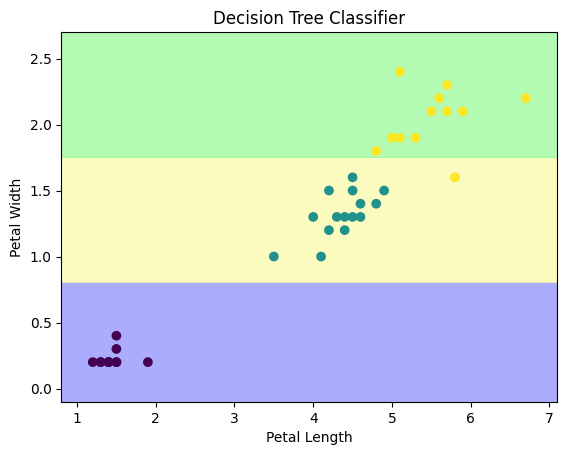

In [20]:
# Plot the decision boundaries
x0_min, x0_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
x1_min, x1_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx0, xx1 = np.meshgrid(np.linspace(x0_min, x0_max, 1000),
                       np.linspace(x1_min, x1_max, 1000))
X_new = np.c_[xx0.ravel(), xx1.ravel()]
y_predict = best_dtc.predict(X_new)
zz = y_predict.reshape(xx0.shape)
custom_cmap = ListedColormap(['#9898ff', '#fafab0', '#a0faa0'])
plt.contourf(xx0, xx1, zz, cmap=custom_cmap, alpha=0.8)

# Plot the dataset
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title("Decision Tree Classifier")
plt.show()
